<a href="https://colab.research.google.com/github/Sourabh7k-Insights/Yulu-Bike_Sharing-_Project/blob/main/Yulu_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Yulu- Case Study

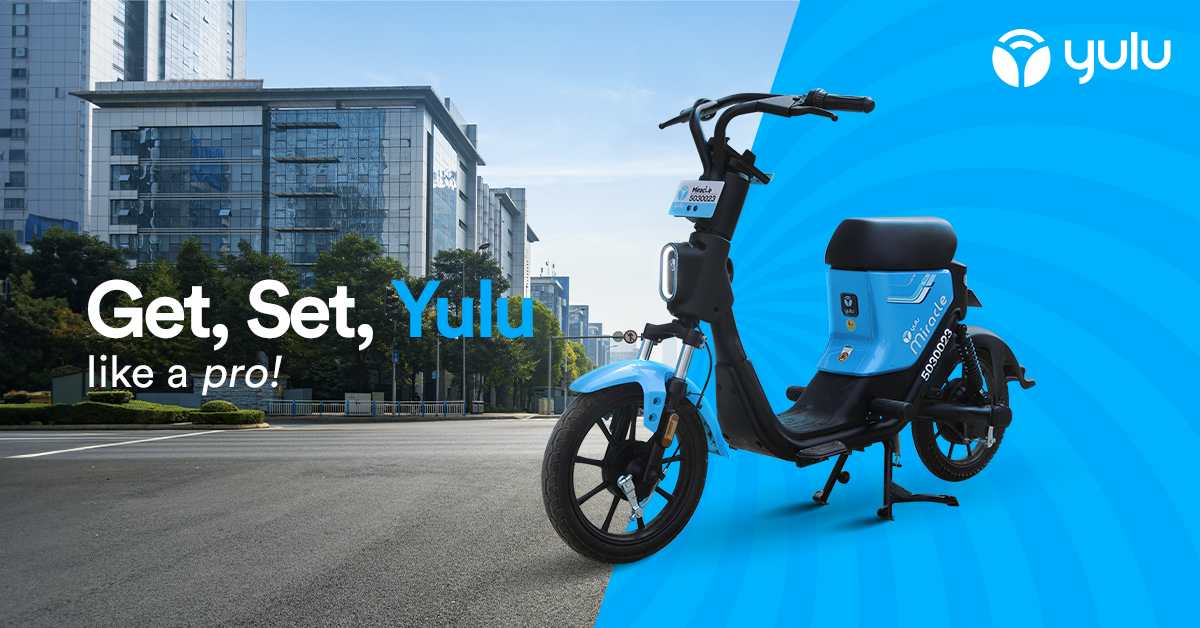

In [1]:
# @title Yulu Case-Study  {"display-mode":"code"}
from IPython.display import Image

# Display the uploaded image
Image(filename='/content/sample_data/Yulu.png',width=1100, height=700)

####Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution through a user-friendly mobile app to enable shared, solo and sustainable commuting.

##**Problem Statement**
1.Which variables are significant in predicting the demand for shared electric cycles in the Indian market?

2.How well those variables describe the electric cycle demands


##Exploratory Data Analysis

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
yulu = pd.read_csv('/content/sample_data/bike_sharing.csv')
yulu.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
yulu['weather'].unique()

array([1, 2, 3, 4])

In [5]:
print(yulu.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB
None


In [6]:
yulu.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


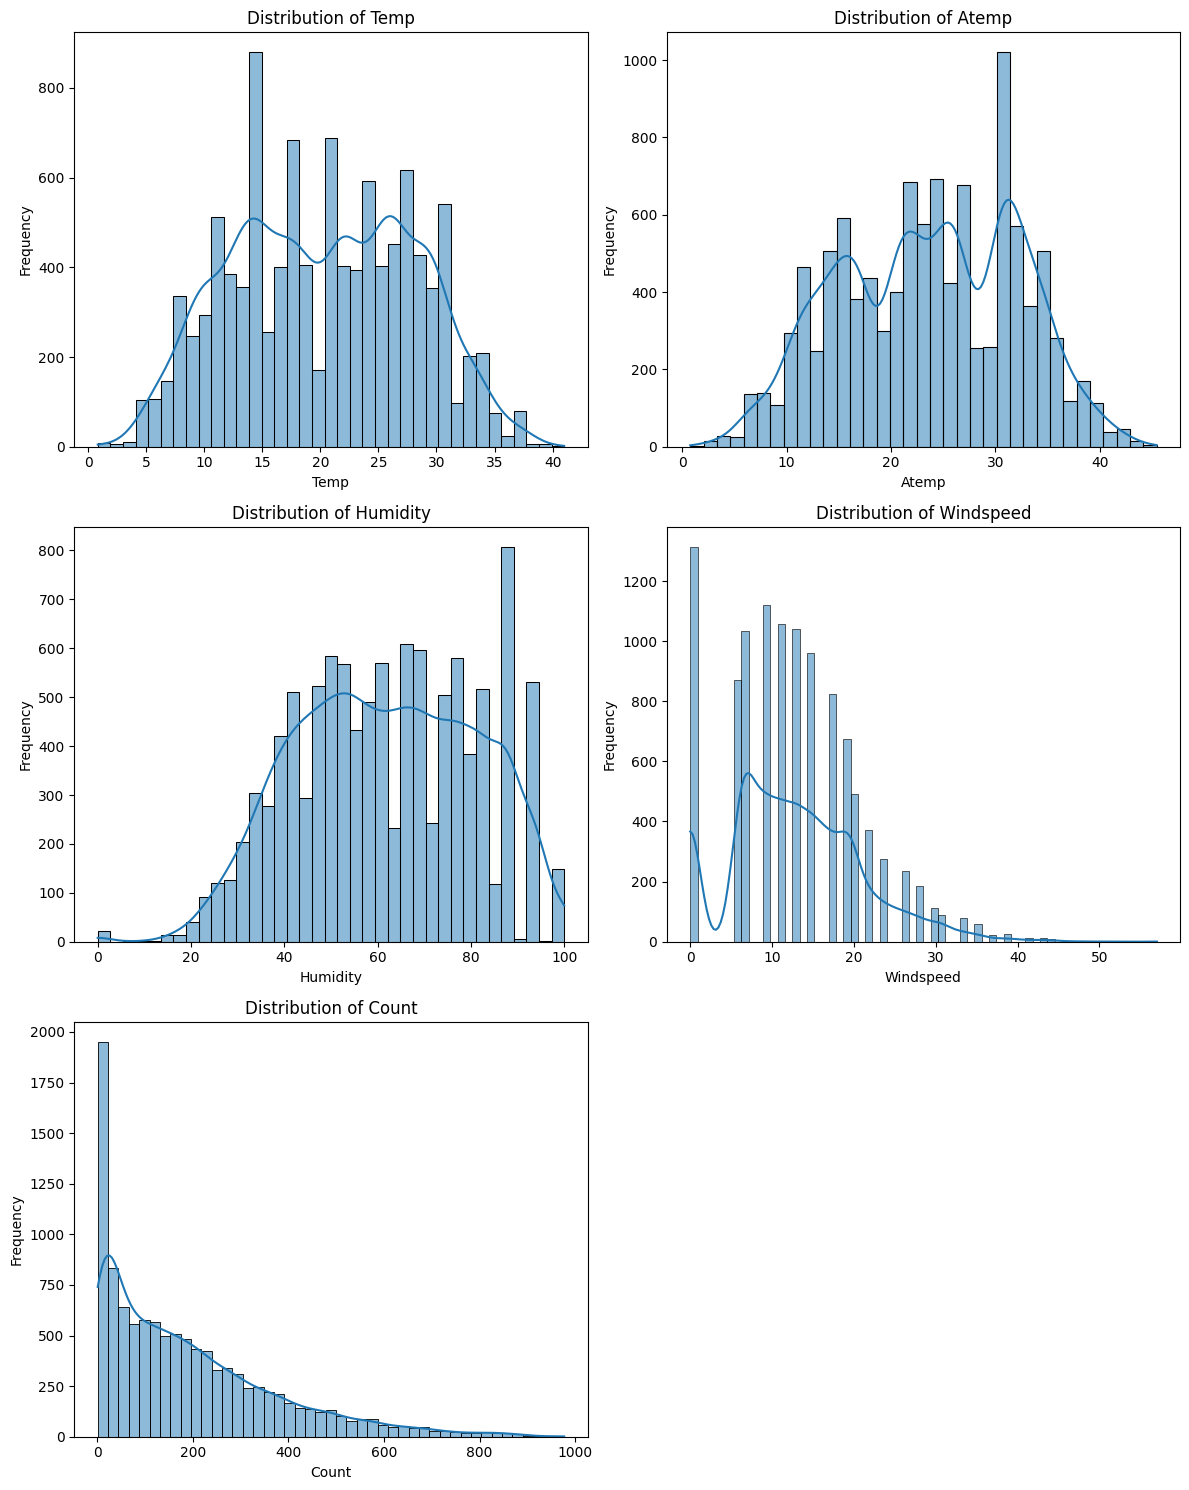

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

sns.histplot(yulu['temp'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribution of Temp")
axes[0, 0].set_xlabel("Temp")
axes[0, 0].set_ylabel("Frequency")

sns.histplot(yulu['atemp'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title("Distribution of Atemp")
axes[0, 1].set_xlabel("Atemp")
axes[0, 1].set_ylabel("Frequency")

sns.histplot(yulu['humidity'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title("Distribution of Humidity")
axes[1, 0].set_xlabel("Humidity")
axes[1, 0].set_ylabel("Frequency")

sns.histplot(yulu['windspeed'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title("Distribution of Windspeed")
axes[1, 1].set_xlabel("Windspeed")
axes[1, 1].set_ylabel("Frequency")

sns.histplot(yulu['count'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title("Distribution of Count")
axes[2, 0].set_xlabel("Count")
axes[2, 0].set_ylabel("Frequency")

fig.delaxes(axes[2, 1])
plt.tight_layout()
plt.show()


## Insights On Distribuition
1. **temp and atemp (Temperature and Feels-Like Temperature)**
- Most rentals are peaking around moderate temperatures(around 15 to 30 degrees)
- Extreme temperatures (too hot or too cold) correspond with reduced rentals.
2. **humidity**
- A wide distribution ranging from 40 to 80 suggests bike demand exists across varying humidity levels.
3. **windspeed**
- High windspeeds likely discourage bike usage.
4. **count** (Inclusive Registered and Casual)
- the distribution is right skewed, demand is concentrated in specific periods or conditions.

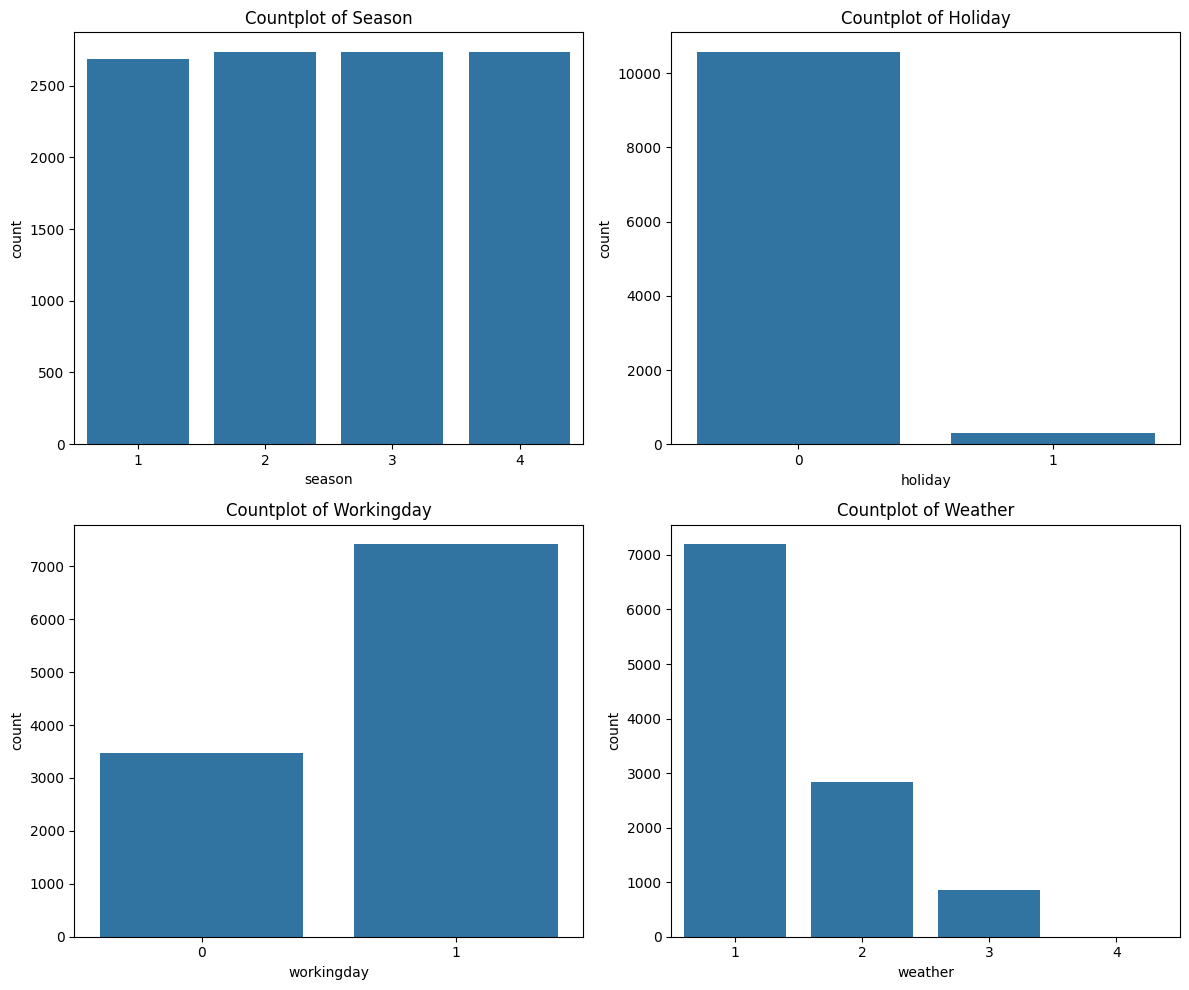

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

sns.countplot(data=yulu, x='season', ax=axes[0, 0])
axes[0, 0].set_title("Countplot of Season")

sns.countplot(data=yulu, x='holiday', ax=axes[0, 1])
axes[0, 1].set_title("Countplot of Holiday")

sns.countplot(data=yulu, x='workingday', ax=axes[1, 0])
axes[1, 0].set_title("Countplot of Workingday")

sns.countplot(data=yulu, x='weather', ax=axes[1, 1])
axes[1, 1].set_title("Countplot of Weather")

plt.tight_layout()
plt.show()


## Insights on Countplot
1. **Countplot of season**
- The number of rentals aren uniform in nature, suggesting a continuos use of bikes irrespective of season changes.
2. **Countplot of holiday**
- A stark difference in counts between holidays (1) and non-holidays (0) reveals that people rent more bikes on non-holidays.
3. **Countplot of workingday**
- Comparing weekdays (1) and weekends (0) show that bikes are oftenly preferred for Traveling from home to Office.
4. **Countplot of weather**
- Clear or partly cloudy days (category 1) often see the highest counts, emphasizing the preference for favorable weather conditions.


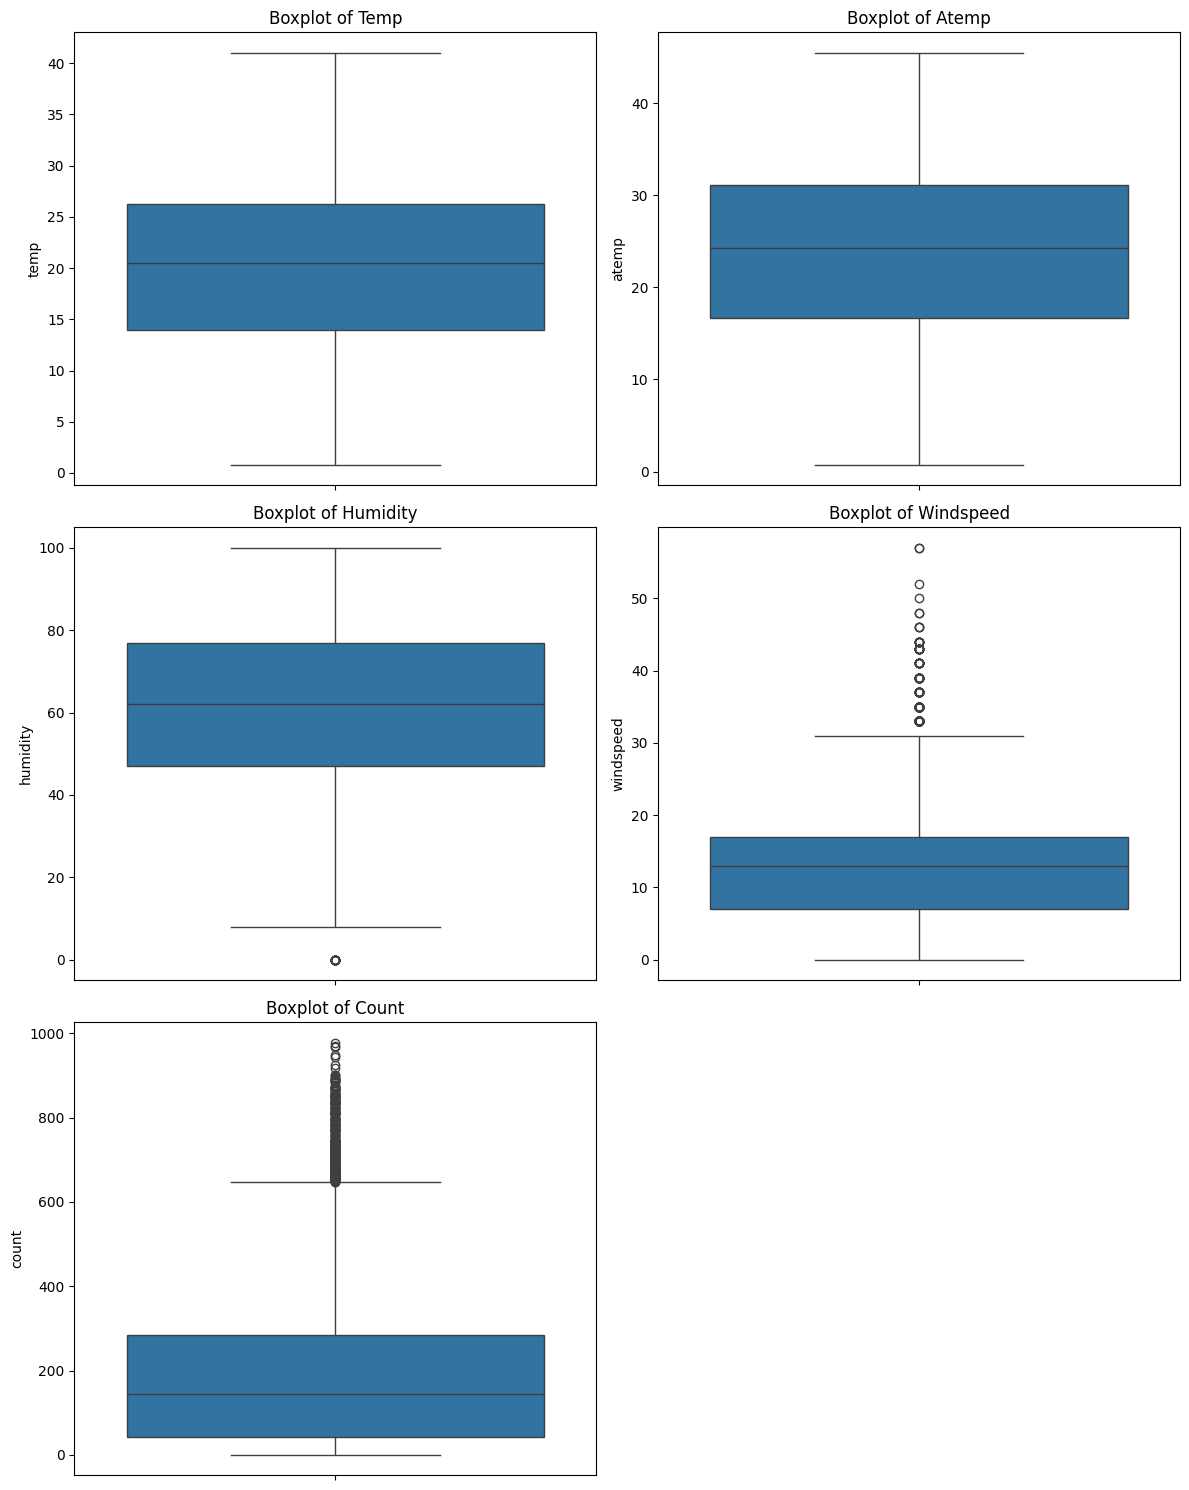

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 15))

sns.boxplot(data=yulu, y='temp', ax=axes[0, 0])
axes[0, 0].set_title("Boxplot of Temp")

sns.boxplot(data=yulu, y='atemp', ax=axes[0, 1])
axes[0, 1].set_title("Boxplot of Atemp")

sns.boxplot(data=yulu, y='humidity', ax=axes[1, 0])
axes[1, 0].set_title("Boxplot of Humidity")

sns.boxplot(data=yulu, y='windspeed', ax=axes[1, 1])
axes[1, 1].set_title("Boxplot of Windspeed")

sns.boxplot(data=yulu, y='count', ax=axes[2, 0])
axes[2, 0].set_title("Boxplot of Count")
fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()


In [10]:
yulu['datetime'] = pd.to_datetime(yulu['datetime'])

yulu['day'] = yulu['datetime'].dt.day
yulu['month'] = yulu['datetime'].dt.month

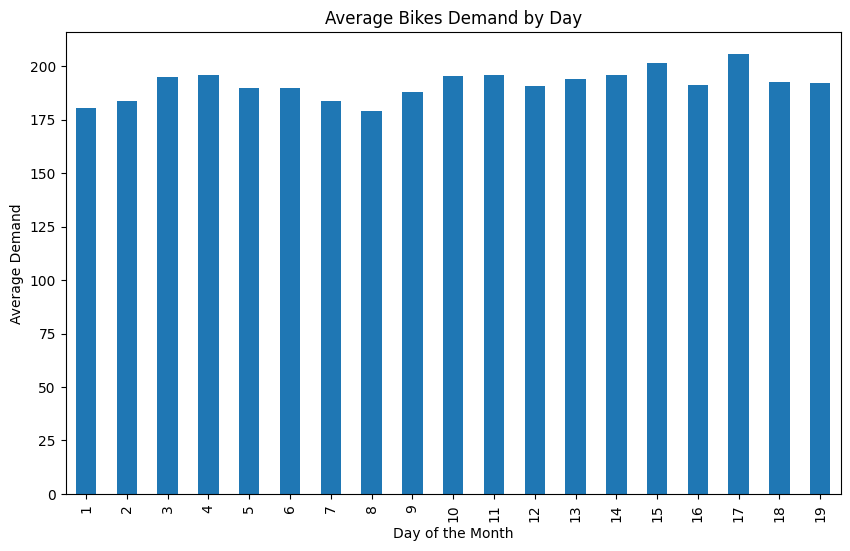

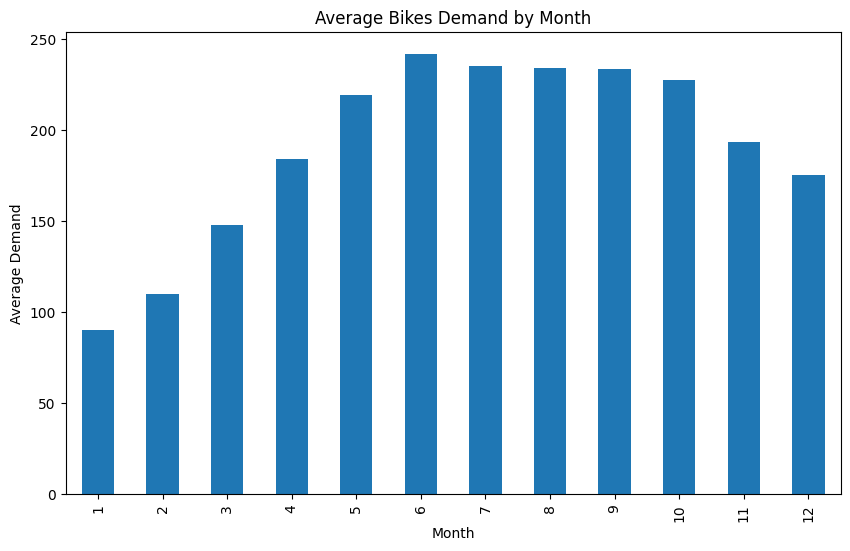

In [11]:
import matplotlib.pyplot as plt
daily_demand = yulu.groupby('day')['count'].mean()

monthly_demand = yulu.groupby('month')['count'].mean()

plt.figure(figsize=(10, 6))
daily_demand.plot(kind='bar')
plt.title('Average Bikes Demand by Day')
plt.xlabel('Day of the Month')
plt.ylabel('Average Demand')
plt.show()

plt.figure(figsize=(10, 6))
monthly_demand.plot(kind='bar')
plt.title('Average Bikes Demand by Month')
plt.xlabel('Month')
plt.ylabel('Average Demand')
plt.show()


1. **Average Demand of Bikes by Day**
- Shows a uniform distribuition suggests use of bikes is commonly used on day to day basis irrespective other factors.
2. **Average Demand of Bikes by Month**
- Higher demand in summer months(June, July, August) indicates seasonal preferences for outdoor activities.
- Lower demand in winter months (December, January, february) suggests challenges with cold weather, rain, or snow.


season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: count, dtype: float64


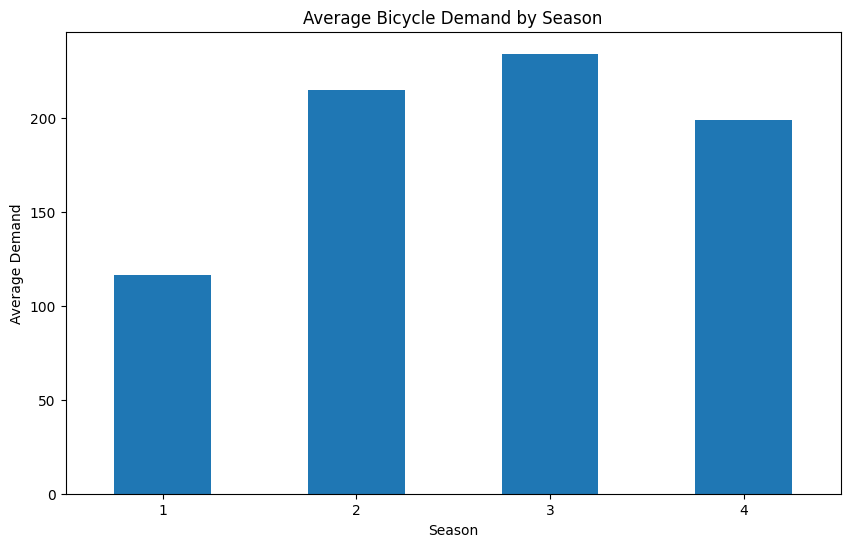

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

seasonal_demand = yulu.groupby('season')['count'].mean()
# seasonal_count = yulu.groupby('season')['count'].count()
# print(seasonal_count)
print(seasonal_demand)

plt.figure(figsize=(10, 6))
seasonal_demand.plot(kind='bar')
plt.title('Average Bicycle Demand by Season')
plt.xlabel('Season')
plt.ylabel('Average Demand')
plt.xticks(rotation=0)
plt.show()


## Insights on Average Demand of Bikes by Season
**Season:**

1: Spring ,  2: Summer,  3: Fall,  4: Winter

1. **Spring** : indicates lower count compared to others suggests, People are likely to rent bikes for leisure or fitness resulting low rentals.

2. **Summer** : indicates high demand due to longer daylight hours and ideal weather for outdoor activities.

3. **Fall** : indicates high demand due to lower temperatures and ideal weather for outdoor activities.

4. **Winter** :indicates moderate demand due to drop in temperatures leading to inconvinient weather and cold.

In [13]:
weather_counts = yulu['weather'].value_counts()
print(weather_counts)

weather
1    7192
2    2834
3     859
4       1
Name: count, dtype: int64


weather
1    205.236791
2    178.955540
3    118.846333
Name: count, dtype: float64


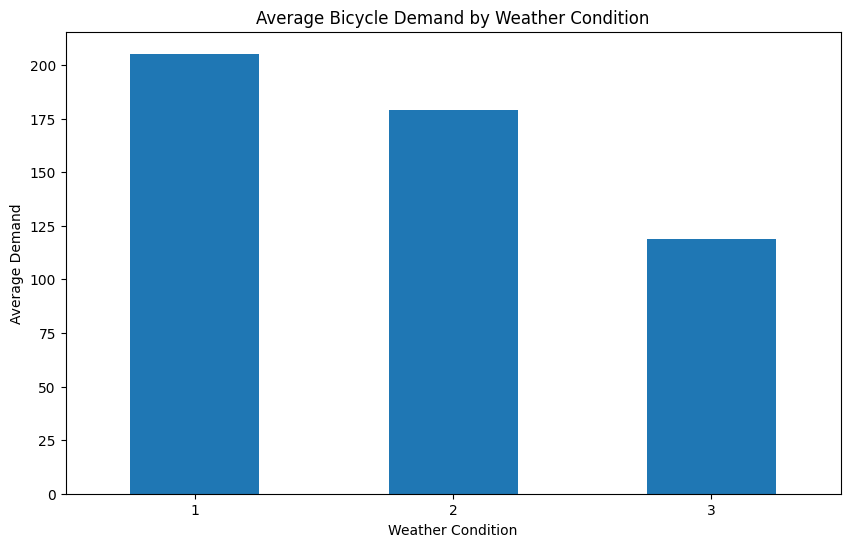

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

weather_demand = yulu.groupby('weather')['count'].mean()
# weather_count=yulu.groupby('weather')['count'].count()
weather_demand_123 = weather_demand[weather_demand.index != 4]

print(weather_demand_123)

plt.figure(figsize=(10, 6))
weather_demand_123.plot(kind='bar')
plt.title('Average Bicycle Demand by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Demand')
plt.xticks(rotation=0)
plt.show()


## Insights on Average Demand of Bikes by Weather
1: Clear, Few clouds, partly cloudy, partly cloudy
- Indicates High Demand due to favorable conditions encourage outdoor activities like leisure cycling and fitness.
- Ideal weather for both casual and registered Users

2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
- Indicates Moderate Demand due to factors like humidity and windspeed in higher side making it inconvinient.

3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- Indicates lower demand due to light rain making it inconvinient for Users.

4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- Considered as Outlier due to presence of only 1 Record affecting the judgment.


 ## If there is a significant difference between the number of bike rides on weekdays and weekends.

 **Null Hypothesis:** No significant difference in bike demand between weekdays and weekends.

 **Alternate Hypothesis:** There is a significant difference in bike demand between weekdays and weekends


In [15]:
import numpy as np
from scipy.stats import ttest_ind
weekend = yulu[yulu['workingday'] == 0]['count']
weekday = yulu[yulu['workingday'] == 1]['count']

sample_size = 3474

weekday_sample = weekday.sample(n=sample_size, random_state=123)

t_stat, p_value = ttest_ind(weekday_sample, weekend)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis: There is a significant difference in bike demand between weekdays and weekends.")
else:
    print("Fail to reject the null hypothesis: No significant difference in bike demand between weekdays and weekends.")


T-statistic: 0.7190849606351566, P-value: 0.4721127633620421
Fail to reject the null hypothesis: No significant difference in bike demand between weekdays and weekends.


## Insights on  difference in bike demand between weekdays and weekends
#### The T-test result indicates that we fail to reject the null hypothesis, which means there is no statistically significant difference in bike demand between weekdays and weekends.


1. Bike demand remains stable across weekdays and weekends, suggesting similar usage patterns on all days.
2. A significant proportion of users are regular commuters (e.g., for work or school) who also use bikes for leisure or errands on weekends.


In [16]:
# !pip install pingouin

## If the demand for bicycles on rent is the same across different weather conditions.

 **Null Hypothesis:** The mean bike rentals are the **same** across all weather conditions.

 **Alternate Hypothesis:** The mean bike rentals **differ** across at least one weather condition.

In [17]:
yulu['weather'].unique()

array([1, 2, 3, 4])

**1:** Clear, Few clouds, partly cloudy, partly cloudy

**2:** Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

**3:** Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

**4:** Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro, levene, f_oneway
import numpy as np

Weather_1 = yulu[yulu['weather'] == 1]['count']
Weather_2 = yulu[yulu['weather'] == 2]['count']
Weather_3 = yulu[yulu['weather'] == 3]['count']
Weather_4 = yulu[yulu['weather'] == 4]['count']

sample_size=859
Weather_1=Weather_1.sample(sample_size,random_state=123)
Weather_2=Weather_2.sample(sample_size,random_state=123)
Weather_3=Weather_3.sample(sample_size,random_state=123)

# print(Weather_1.count())
# print(Weather_2.count())
# print(Weather_3.count())
# print(Weather_4.count())

# 3. Shapiro-Wilk Test for Normality
stat_1, p_1 = shapiro(Weather_1)
stat_2, p_2 = shapiro(Weather_2)
stat_3, p_3 = shapiro(Weather_3)
# stat_4, p_4 = shapiro(Weather_4)

print(f"Shapiro-Wilk Test for Weather 1: p-value = {p_1}")
print(f"Shapiro-Wilk Test for Weather 2: p-value = {p_2}")
print(f"Shapiro-Wilk Test for Weather 3: p-value = {p_3}",end='\n\n')
# print(f"Shapiro-Wilk Test for Weather 4: p-value = {p_4}")

# 4. Levene's Test for Equality of Variances
levene_stat, levene_p = levene(Weather_1, Weather_2, Weather_3, Weather_4)
print(f"Levene's Test: p-value = {levene_p}",end='\n\n')


from scipy.stats import kruskal

# Perform Kruskal-Wallis test
test_stat, p_value = kruskal(Weather_1, Weather_2, Weather_3)

print(f"H-statistic: {test_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis: The demand for bicycles is different across weather conditions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in demand across weather conditions.")



Shapiro-Wilk Test for Weather 1: p-value = 3.2717002548854747e-26
Shapiro-Wilk Test for Weather 2: p-value = 1.0616266432721306e-25
Shapiro-Wilk Test for Weather 3: p-value = 3.875893017396094e-33

Levene's Test: p-value = 3.548444720466161e-19

H-statistic: 111.6736974087719
P-value: 5.628137781953574e-25
Reject the null hypothesis: The demand for bicycles is different across weather conditions.


In [19]:
from scipy.stats import f_oneway

weather_categories = yulu['weather'].unique()

Weather_1 = yulu[yulu['weather'] == 1]['count']
Weather_2 = yulu[yulu['weather'] == 2]['count']
Weather_3 = yulu[yulu['weather'] == 3]['count']
Weather_4 = yulu[yulu['weather'] == 4]['count']
# print(Weather_1,Weather_2,Weather_3,Weather_4)
sample_size=859
Weather_1=Weather_1.sample(sample_size,random_state=123)
Weather_2=Weather_2.sample(sample_size,random_state=123)
Weather_3=Weather_3.sample(sample_size,random_state=123)

# Perform One-Way ANOVA
f_stat, p_value = f_oneway(Weather_1,Weather_2,Weather_3)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

alpha = 0.05
if p_value <= alpha:
    print("Reject the null hypothesis: The demand for bicycles is different across weather conditions.")
else:
    print("Fail to reject the null hypothesis: No significant difference in demand across weather conditions.")


F-statistic: 56.10482615790468
P-value: 1.4129804302580244e-24
Reject the null hypothesis: The demand for bicycles is different across weather conditions.


In [20]:
from scipy.stats import ttest_ind

Weather_1 = yulu[yulu['weather'] == 1]['count']
Weather_2 = yulu[yulu['weather'] == 2]['count']
Weather_3 = yulu[yulu['weather'] == 3]['count']
Weather_4 = yulu[yulu['weather'] == 4]['count']

sample_size=859
Weather_1=Weather_1.sample(sample_size,random_state=123)
Weather_2=Weather_2.sample(sample_size,random_state=123)
Weather_3=Weather_3.sample(sample_size,random_state=123)
weather_pairs = [(1, 2), (2, 3)]

# Perform T-tests and print results for each pair
for pair in weather_pairs:
    group1 = yulu[yulu['weather'] == pair[0]]['count']
    group2 = yulu[yulu['weather'] == pair[1]]['count']

    # Perform T-test with unequal variance (Welch's T-test)
    t_stat, p_value = ttest_ind(group1, group2, equal_var=False, alternative='greater')  # one-sided test

    print(f"Weather Pair: {pair[0]} vs {pair[1]}")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")

    alpha = 0.05
    if p_value <= alpha:
        print(f"Reject the null hypothesis: The mean bike demand in Weather {pair[0]} is less than or equal to the mean bike demand in Weather {pair[1]}.")
    else:
        print(f"Fail to reject the null hypothesis:The mean bike demand in Weather {pair[0]} is greater than the mean bike demand in Weather {pair[2]}.")
    print("-" * 40)


Weather Pair: 1 vs 2
T-statistic: 6.805145451384404
P-value: 5.559720036421719e-12
Reject the null hypothesis: The mean bike demand in Weather 1 is less than or equal to the mean bike demand in Weather 2.
----------------------------------------
Weather Pair: 2 vs 3
T-statistic: 10.566686593632499
P-value: 1.2784024990919133e-25
Reject the null hypothesis: The mean bike demand in Weather 2 is less than or equal to the mean bike demand in Weather 3.
----------------------------------------


### Insights on demand for bikes on rent is the same across different weather conditions.

- The p-value is far below the significance level (0.05), indicating that the result is highly significant.
- This means we reject the null hypothesis, confirming that the mean bike rentals differ across at least one weather condition.

1. Weather 1 (Clear/Partly Cloudy) has the highest mean bike demand, significantly exceeding that of Weather 2 (Mist/Cloudy).

2. Weather 2 (Mist/Cloudy) also outperforms Weather 3 (Light Snow/Light Rain) in terms of bike demand.

3. As weather conditions worsen from clear skies to snowy/rainy conditions, the average bike demand drops significantly. This trend suggests that bike rentals are highly sensitive to weather conditions, with demand decreasing in less favorable conditions.



### If the demand for bicycles on rent is the same for different seasons.

In [21]:
yulu['season'].unique()

array([1, 2, 3, 4])

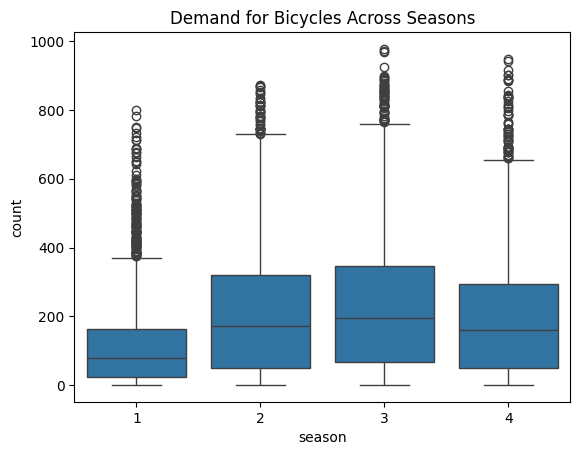

In [22]:
# Visualize the data with a boxplot
sns.boxplot(x='season', y='count', data=yulu)
plt.title('Demand for Bicycles Across Seasons')
plt.show()

**Season:**

**1:** Spring

**2:** Summer

**3:** Fall

**4:** Winter

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import f_oneway, shapiro, levene

# Check normality using Shapiro-Wilk Test
season_1 = yulu[yulu['season'] == 1]['count']
season_2 = yulu[yulu['season'] == 2]['count']
season_3 = yulu[yulu['season'] == 3]['count']
season_4 = yulu[yulu['season'] == 4]['count']
# print(season_1.count())
# print(season_2.count())
# print(season_3.count())
# print(season_4.count())

sample_size=2686
season1=season_1.sample(sample_size,random_state=123)
season2=season_2.sample(sample_size,random_state=123)
season3=season_3.sample(sample_size,random_state=123)
season4=season_4.sample(sample_size,random_state=123)

# Shapiro-Wilk Test for normality
stat_1, p_value_1 = shapiro(season_1)
stat_2, p_value_2 = shapiro(season_2)
stat_3, p_value_3 = shapiro(season_3)
stat_4, p_value_4 = shapiro(season_4)

# Levene's Test for equality of variance
stat, p_value_levene = levene(season_1, season_2, season_3, season_4)


# Output Results
print(f"Shapiro Test p-values: {p_value_1}, {p_value_2}, {p_value_3}, {p_value_4}")
print(f"Levene's Test p-value: {p_value_levene}")


Shapiro Test p-values: 8.749584618867662e-49, 6.039374406270491e-39, 1.043680518918597e-36, 1.1299244409282836e-39
Levene's Test p-value: 1.0147116860043298e-118


In [24]:
import scipy.stats as stats

# Extract 'count' data for each season
season_1 = yulu[yulu['season'] == 1]['count']
season_2 = yulu[yulu['season'] == 2]['count']
season_3 = yulu[yulu['season'] == 3]['count']
season_4 = yulu[yulu['season'] == 4]['count']

sample_size=2686
season1=season_1.sample(sample_size,random_state=123)
season2=season_2.sample(sample_size,random_state=123)
season3=season_3.sample(sample_size,random_state=123)
season4=season_4.sample(sample_size,random_state=123)

# Perform Kruskal-Wallis H-test
h_stat, p_value = stats.kruskal(season_1, season_2, season_3, season_4)

# Print the results
print(f"Kruskal-Wallis H-statistic: {h_stat}")
print(f"P-value: {p_value}")

# Set significance level
alpha = 0.05

# Interpret the results
if p_value <= alpha:
    print("Reject the null hypothesis: The demand for bicycles is different across seasons.")
else:
    print("Fail to reject the null hypothesis: No significant difference in demand across seasons.")


Kruskal-Wallis H-statistic: 699.6668548181988
P-value: 2.479008372608633e-151
Reject the null hypothesis: The demand for bicycles is different across seasons.


### Insights on the demand for bicycles on rent is the same for different seasons
- The p-value is much smaller than the typical significance level of 0.05. This indicates overwhelming evidence to reject the null hypothesis.
- Reject the null hypothesis: There is a statistically significant difference in bike demand across the different seasons.


##T-test between seasonal pairs

**Null Hypothesis :**The mean bike demand for Season 1 is the same or less than the mean bike demand for Season 2.

**Alternate Hypothesis:** The mean bike demand for Season 1 is greater than the mean bike demand for Season 2

In [25]:
from scipy.stats import ttest_ind

# Collect counts for each season category
season_1 = yulu[yulu['season'] == 1]['count']
season_2 = yulu[yulu['season'] == 2]['count']
season_3 = yulu[yulu['season'] == 3]['count']
season_4 = yulu[yulu['season'] == 4]['count']

# List of season category pairs to test
season_pairs = [(1, 2), (2, 3), (3, 4)]

# Perform T-tests and print results for each pair
for pair in season_pairs:
    group1 = yulu[yulu['season'] == pair[0]]['count']
    group2 = yulu[yulu['season'] == pair[1]]['count']

    # Perform T-test with unequal variance (Welch's T-test)
    t_stat, p_value = ttest_ind(group1, group2, equal_var=False, alternative='greater')  # one-sided test

    # Print the results
    print(f"Season Pair: {pair[0]} vs {pair[1]}")
    print(f"T-statistic: {t_stat}")
    print(f"P-value: {p_value}")

    # Interpret the results
    alpha = 0.05
    if p_value <= alpha:
        print("Reject the null hypothesis: The mean bike demand for Season 1 is the same or less than the mean bike demand for Season 2..")
    else:
        print("Fail to reject the null hypothesis:The mean bike demand for Season 1 is greater than the mean bike demand for Season 2.")
    print("-" * 40)  # Separator between pairs


Season Pair: 1 vs 2
T-statistic: -22.495212049881932
P-value: 1.0
Fail to reject the null hypothesis:The mean bike demand for Season 1 is greater than the mean bike demand for Season 2.
----------------------------------------
Season Pair: 2 vs 3
T-statistic: -3.6407918229052068
P-value: 0.9998628413132901
Fail to reject the null hypothesis:The mean bike demand for Season 1 is greater than the mean bike demand for Season 2.
----------------------------------------
Season Pair: 3 vs 4
T-statistic: 6.980228198369972
P-value: 1.6507274110054982e-12
Reject the null hypothesis: The mean bike demand for Season 1 is the same or less than the mean bike demand for Season 2..
----------------------------------------


### Insights on Seasonal pairs
- Are not greator in demand between Seasons 1 and 2, and between Seasons 2 and 3.

- Significant difference in demand between Seasons 3 and 4 showing Season 3 has higher rental compared to Season 4 , indicating a notable change in demand for bikes during these seasons.

- Indicating Season 3(Fall) has the highest Rental across all the seasons.

###  If weather conditions are significantly different during different seasons

**Null Hypothesis**: Weather conditions are independent of seasons.

**Alterante Hypothesis**: Weather conditions are dependent on seasons.

In [26]:
from scipy.stats import chi2_contingency

# Create contingency table
contingency_table = pd.crosstab(yulu['weather'], yulu['season'])
print(contingency_table)

# Perform Chi-Square Test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-Square Statistic: {chi2_stat}, P-value: {p_value}")

if p_value <= alpha:
    print("Reject the null hypothesis: Weather conditions are dependent on seasons.")
else:
    print("Fail to reject the null hypothesis: Weather conditions are independent of seasons.")


season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225
4           1     0     0     0
Chi-Square Statistic: 49.15865559689363, P-value: 1.5499250736864862e-07
Reject the null hypothesis: Weather conditions are dependent on seasons.


### Insights on weather conditions are significantly different during different seasons
- the p-value (1.55e-07) is much smaller than the typical significance level of 0.05, we reject the null hypothesis.

- demand for bike rentals across different weather conditions varies significantly by season.


## Recommendations & Insights Overall:
1. **Demand Analysis by Weather Conditions**
-  The demand for bikes varies significantly across weather conditions. For instance, clear weather shows higher demand compared to rainy or snowy conditions.
-During clear weather conditions, consider increasing bike availability and possibly introducing pricing strategies to capitalize on high demand

2. **Demand Analysis by Season:**
- The bike demand also varies significantly across seasons, with some seasons showing higher demand than others.
- Seasonal Promomtions and seasonal Partnership

3. **Demand Analysis by Weather and Season Pairings:**
-  Significant differences in demand exist between different weather conditions within seasons
-  Design marketing campaigns that target specific weather conditions within seasons

4. Use historical weather and season data to predict demand patterns more accurately